<a href="https://colab.research.google.com/github/Plumz17/PCD_Assignments/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# First Digital Image Processing Assignment - Analysis of Upsampling and Downsampling - Anders Emmanuel Tan (24/541351/PA/22964)

# Import Important Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = "image.png"
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Change the color map since apparently CV2 defaults on BGR and not RGB

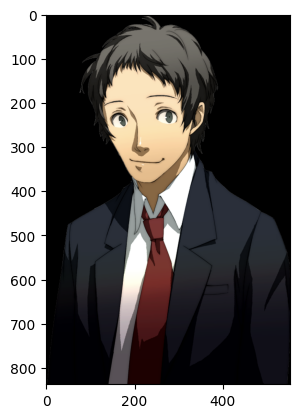

In [13]:
def show(img): # Helper function to check if image can be processed
  plt.imshow(img)

show(img)

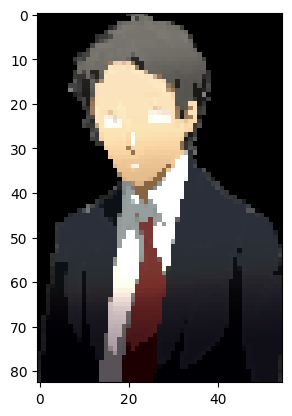

In [19]:
def downsample_max(img, factor):
  height, width, channels = img.shape ##Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height):
    for j in range(new_width):
      block = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor] # Extract the current block of the image
      new_img[i, j] = np.max(block, axis=(0, 1)) # Find the maximum value of each block and put that in the new image
  return new_img

show(downsample_max(img, 10))

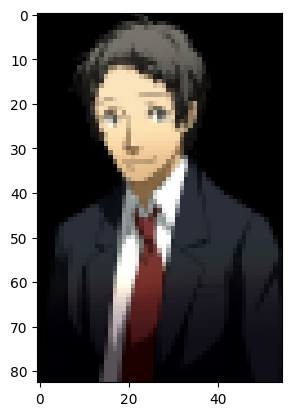

In [21]:
def downsample_avg(img, factor):
  height, width, channels = img.shape ##Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height):
    for j in range(new_width):
      block = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor] # Extract the current block of the image
      new_img[i, j] = np.average(block, axis=(0, 1)) # Find the average value of each block and put that in the new image
  return new_img

show(downsample_avg(img, 10))

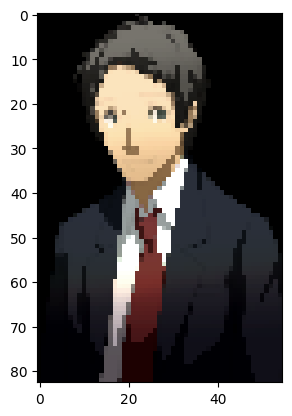

In [22]:
def downsample_med(img, factor):
  height, width, channels = img.shape ##Extract the height, width, and channels of the image
  new_height = height // factor
  new_width = width // factor
  new_img = np.zeros((new_height, new_width, channels), dtype=np.uint8) # Create an empty image with the reduced size
  for i in range(new_height):
    for j in range(new_width):
      block = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor] # Extract the current block of the image
      new_img[i, j] = np.median(block, axis=(0, 1)) # Find the median value of each block and put that in the new image
  return new_img

show(downsample_med(img, 10))